#### Dataset

In [2]:
# Social_Network_Ads.csv
# https://mitu.co.in/dataset

#### Import the libraries

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Load the data

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')

In [7]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


#### Separate the input and output variables 

In [9]:
# input variable
x = df[['Age','EstimatedSalary']]

# output variable
y = df['Purchased']

In [10]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


#### EDA

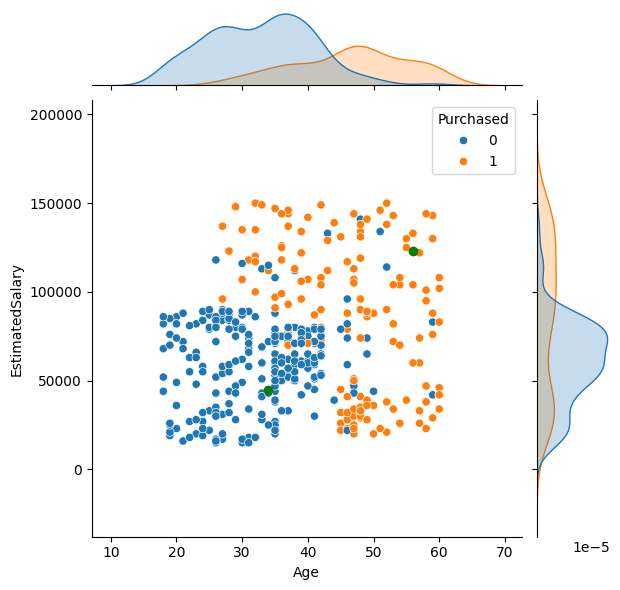

In [18]:
sns.jointplot(x ='Age', y = 'EstimatedSalary', hue = 'Purchased', data = df)
plt.scatter([34,56],[45000,123000], color = 'g', marker = 'o',)

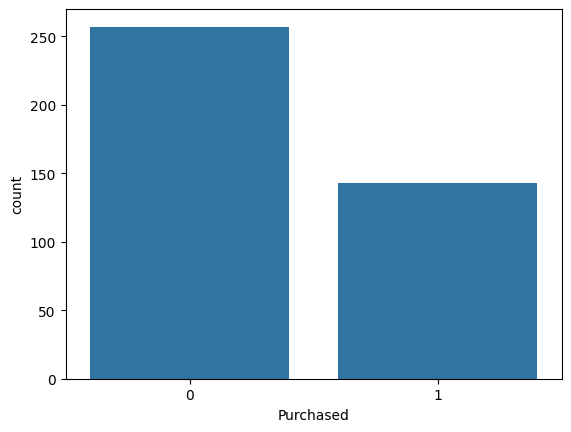

In [21]:
sns.countplot(x= y);

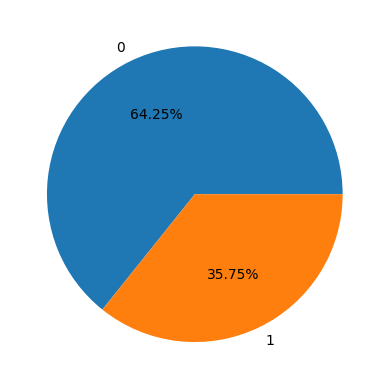

In [25]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

<Axes: xlabel='Age', ylabel='Density'>

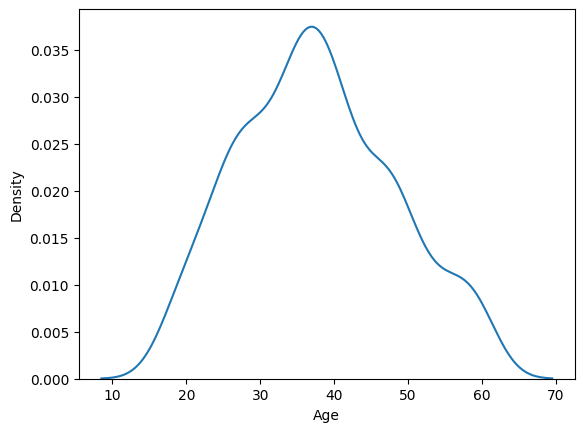

In [24]:
sns.kdeplot(x['Age'])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

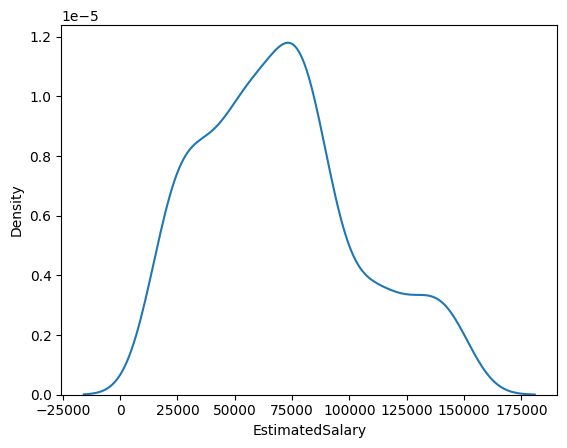

In [26]:
sns.kdeplot(x['EstimatedSalary'])

<Axes: ylabel='Age'>

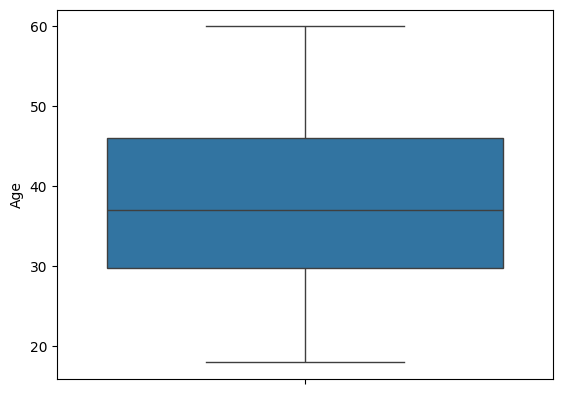

In [28]:
sns.boxplot(x['Age'])

<Axes: ylabel='EstimatedSalary'>

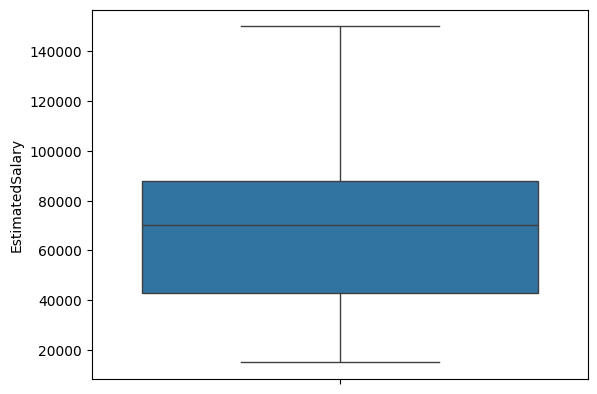

In [29]:
sns.boxplot(x['EstimatedSalary'])

In [30]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [31]:
set(y)

{0, 1}

In [32]:
np.unique(y)

array([0, 1])

#### Feature Scaling - Normalization

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
x_scaled = scaler.fit_transform(x)

In [40]:
x_scaled.min(axis=0)

array([0., 0.])

In [41]:
x_scaled.max(axis=0)

array([1., 1.])

#### Cross Validation

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, random_state=0)

In [120]:
x_train.shape

(300, 2)

In [121]:
x_test.shape

(100, 2)

#### Build the model

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
classifier = LogisticRegression()

In [124]:
classifier.fit(x_train, y_train)

LogisticRegression()

#### Analysis

In [125]:
# predict on the test dataset
y_pred = classifier.predict(x_test)

In [126]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [127]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [57]:
y_pred == y_test.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True])

In [61]:
sum(y_pred == y_test)

89

In [60]:
list(y_pred == y_test).count(True)

89

In [62]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

In [64]:
confusion_matrix(y_test, y_pred)

array([[67,  1],
       [10, 22]])

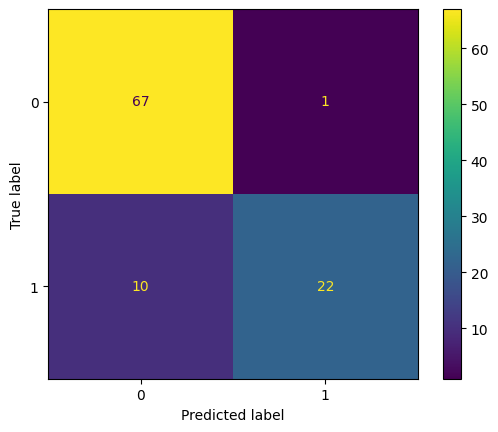

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [66]:
accuracy_score(y_test, y_pred)

0.89

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [68]:
r0 = 67/68
r0

0.9852941176470589

In [69]:
r1 = 22/32
r1

0.6875

In [73]:
p0 = 67/77
p0

0.8701298701298701

In [74]:
p1= 22/23
p1

0.9565217391304348

In [76]:
f0 = 2 * (p0 * r0) / (p0 + r0)
f0

0.9241379310344828

In [77]:
f1 = 2 * (p1 * r1) / (p1 + r1)
f1

0.8

#### Predict the unknow data

In [80]:
new = np.array([[34,45000],[56,123000]])

In [86]:
newdf = pd.DataFrame(data=[[34,45000],[56,123000]], columns=x.columns)

In [87]:
newdf

,Age,EstimatedSalary
0,34,45000
1,56,123000


In [89]:
new_scaled = scaler.transform(newdf)

In [90]:
new_scaled

array([[0.38095238, 0.22222222],
       [0.9047619 , 0.8       ]])

In [91]:
classifier.predict(new_scaled)

array([0, 1])

In [93]:
classifier.predict_proba(new_scaled)

array([[0.84052772, 0.15947228],
       [0.08574686, 0.91425314]])

In [94]:
data = pd.DataFrame({
    'x1': [56,13,11,57,77,97,32],
    'x2': [34555,34766,76455,23857,86788,45653,75644]
})

In [96]:
data.min(), data.max()

(x1       11
 x2    23857
 dtype: int64,
 x1       97
 x2    86788
 dtype: int64)

In [97]:
data_scaled = scaler.fit_transform(data)
data_scaled

array([[0.52325581, 0.16999571],
       [0.02325581, 0.17334859],
       [0.        , 0.83580429],
       [0.53488372, 0.        ],
       [0.76744186, 1.        ],
       [1.        , 0.34634759],
       [0.24418605, 0.82291716]])

In [98]:
scaler.data_max_

array([   97., 86788.])

In [99]:
scaler.data_min_

array([1.1000e+01, 2.3857e+04])

In [101]:
newdata = pd.DataFrame({
    'x1': [45,73,88],
    'x2': [78566,59899,45677]
})

In [102]:
scaler.transform(newdata)

array([[0.39534884, 0.86934897],
       [0.72093023, 0.57272251],
       [0.89534884, 0.34672896]])

In [103]:
scaler.fit_transform(newdata)

array([[0.        , 1.        ],
       [0.65116279, 0.43242421],
       [1.        , 0.        ]])

#### Perform without scaling

In [105]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0)

In [106]:
x_train.shape

(300, 2)

In [107]:
x_test.shape

(100, 2)

In [108]:
x_train

,Age,EstimatedSalary
250,44.0,39000.0
63,32.0,120000.0
312,38.0,50000.0
159,32.0,135000.0
283,52.0,21000.0
...,...,...
323,48.0,30000.0
192,29.0,43000.0
117,36.0,52000.0
47,27.0,54000.0


In [109]:
classifier.fit(x_train, y_train)

LogisticRegression()

In [111]:
y_pred = classifier.predict(x_test)

In [112]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [114]:
import sklearn
sklearn.__version__

'1.3.2'

In [128]:
age = int(input("Enter the age:"))
sal = int(input("Enter the salary"))
pred = classifier.predict([[age, sal]])
print("Class:", pred[0])

Enter the age: 45
Enter the salary 89000


Class: 1
